In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:

import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle



In [3]:
Categories=['apple','banana','beetroot','corn','cucumber','pepper','garlic','watermelon','soy bean','kiwi']
print("Type yes to give categories or type no to go with classification of apple, banana, beetroot, corn, cucumber, pepper, garlic, watermelon, soy bean, kiwi");

while(True):
  check=input()
  if(check=='no' or check=='yes'):
    break
  print("Please give a valid input (yes/no)")
if(check=='yes'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")



Type yes to give categories or type no to go with classification of apple, banana, beetroot, corn, cucumber, pepper, garlic, watermelon, soy bean, kiwi
no


In [4]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/class'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : apple


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


loaded category:apple successfully
loading... category : banana
loaded category:banana successfully
loading... category : beetroot
loaded category:beetroot successfully
loading... category : corn
loaded category:corn successfully
loading... category : cucumber
loaded category:cucumber successfully
loading... category : pepper
loaded category:pepper successfully
loading... category : garlic
loaded category:garlic successfully
loading... category : watermelon
loaded category:watermelon successfully
loading... category : soy bean
loaded category:soy bean successfully
loading... category : kiwi
loaded category:kiwi successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.846499,0.741826,0.679838,0.831408,0.729466,0.670071,0.819709,0.715444,0.655046,0.805950,...,0.324502,0.237809,0.168283,0.350605,0.262081,0.186745,0.398291,0.290746,0.205606,0
1,0.928021,0.932579,0.943709,0.932411,0.937935,0.943291,0.932987,0.938203,0.945430,0.932876,...,0.988479,0.994665,0.970410,0.986625,0.996275,0.965575,0.984319,0.995807,0.960060,0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.443648,0.532024,0.570873,0.436076,0.525210,0.563723,0.432165,0.520914,0.559229,0.442771,...,0.805614,0.843421,0.767851,0.808433,0.854147,0.776241,0.812290,0.845994,0.772301,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,0.189025,0.220397,0.271378,0.185430,0.216804,0.267784,0.194583,0.226252,0.277085,0.218473,...,0.268398,0.293178,0.330827,0.249800,0.274570,0.327612,0.279103,0.290819,0.326622,9
835,0.766317,0.800907,0.479813,0.766425,0.800751,0.466194,0.759796,0.801931,0.451714,0.784568,...,0.546627,0.627678,0.181707,0.543684,0.617402,0.199907,0.522261,0.603921,0.144874,9
836,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9
837,0.348813,0.388612,0.003079,0.284741,0.340296,0.003026,0.251695,0.325518,0.003313,0.248366,...,0.391260,0.524791,0.111086,0.415018,0.546333,0.134494,0.383657,0.522637,0.096456,9


In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [6]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for the training to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for the training to complete
The model is trained well with the given images


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [7]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([3, 0, 0, 3, 2, 8, 7, 3, 0, 0, 4, 9, 6, 2, 6, 8, 6, 6, 9, 8, 1, 0,
       1, 7, 1, 3, 4, 9, 2, 3, 6, 4, 6, 6, 7, 0, 9, 1, 9, 4, 8, 0, 8, 0,
       5, 2, 3, 4, 0, 3, 3, 2, 8, 8, 2, 0, 5, 4, 9, 8, 6, 4, 8, 6, 9, 4,
       0, 4, 4, 4, 8, 9, 6, 3, 2, 6, 7, 0, 4, 6, 2, 7, 6, 1, 3, 2, 8, 3,
       6, 3, 4, 1, 9, 8, 4, 0, 9, 2, 6, 4, 1, 3, 4, 8, 3, 2, 8, 6, 4, 1,
       2, 6, 7, 8, 0, 7, 7, 3, 6, 4, 4, 8, 4, 8, 4, 2, 9, 8, 9, 1, 0, 3,
       3, 7, 6, 8, 2, 0, 9, 9, 4, 4, 6, 8, 6, 7, 6, 8, 9, 9, 2, 8, 2, 3,
       6, 6, 9, 6, 4, 0, 4, 0, 6, 5, 2, 6, 7, 1])

In [8]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([3, 7, 0, 3, 7, 8, 7, 8, 0, 0, 4, 4, 6, 2, 6, 8, 6, 6, 9, 8, 1, 7,
       8, 5, 3, 3, 4, 9, 2, 3, 6, 4, 6, 7, 8, 2, 3, 1, 9, 4, 1, 1, 7, 1,
       5, 2, 9, 7, 5, 3, 9, 2, 3, 7, 2, 0, 1, 0, 9, 9, 6, 8, 8, 6, 9, 7,
       0, 8, 4, 0, 9, 9, 6, 3, 2, 6, 8, 8, 3, 6, 2, 6, 6, 1, 3, 2, 3, 7,
       6, 9, 4, 1, 3, 4, 4, 0, 4, 2, 8, 4, 1, 1, 4, 3, 8, 8, 8, 2, 4, 1,
       5, 6, 7, 3, 0, 7, 5, 8, 6, 4, 7, 8, 5, 3, 9, 2, 9, 8, 4, 3, 0, 3,
       1, 8, 6, 2, 2, 0, 9, 9, 4, 4, 9, 0, 6, 3, 4, 7, 9, 9, 2, 8, 2, 3,
       6, 2, 9, 0, 4, 5, 4, 0, 1, 5, 0, 6, 7, 1])

In [9]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100.00}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 58.92857142857143% accurate


In [10]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Image/content/drive/MyDrive/class/beetroot/Image_24.jpg


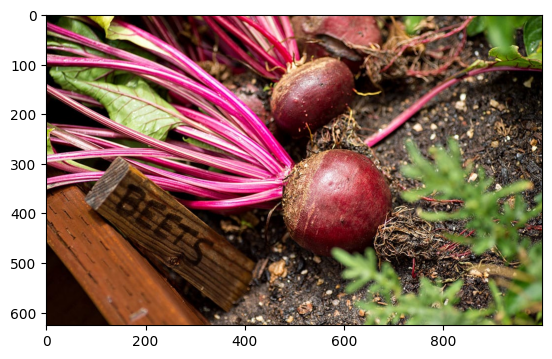

apple = 6.962442840081278%
banana = 0.5724951476925572%
beetroot = 78.54042959391552%
corn = 1.3752050185781028%
cucumber = 0.608167556349075%
pepper = 1.5291926697640519%
garlic = 2.985789271002402%
watermelon = 4.5058155852881026%
soy bean = 1.8251409063954382%
kiwi = 1.095321410933502%
The predicted image is : beetroot
Is the image a beetroot ?(yes/no)
yes
Do you want to test another image? (yes/no) Enter 'no' to quit.
yes
Enter URL of Image/content/drive/MyDrive/class/corn/Image_24.jpg


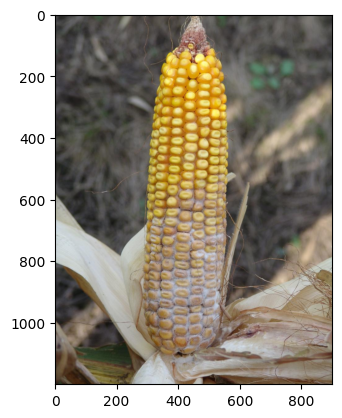

apple = 2.0915104664943587%
banana = 2.0984731127055873%
beetroot = 1.3747547872153658%
corn = 71.27842141425394%
cucumber = 1.5688100322532712%
pepper = 1.9053251645779157%
garlic = 3.338882094410129%
watermelon = 4.951261525390507%
soy bean = 8.517355238462372%
kiwi = 2.8752061642365%
The predicted image is : corn
Is the image a corn ?(yes/no)
yes
Do you want to test another image? (yes/no) Enter 'no' to quit.
no
Thank you for using the image classification system.


In [51]:
import pickle
from skimage.io import imread
from skimage.transform import resize
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


continue_processing = True

while continue_processing:


    url = input('Enter URL of Image')
    img = imread(url)
    plt.imshow(img)
    plt.show()
    img_resize = resize(img, (150, 150, 3))
    l = [img_resize.flatten()]
    probability = model.predict_proba(l)
    for ind, val in enumerate(Categories):
        print(f'{val} = {probability[0][ind]*100}%')
    print("The predicted image is : " + Categories[model.predict(l)[0]])
    print(f'Is the image a {Categories[model.predict(l)[0]]} ?(yes/no)')

    while True:
        b = input()
        if b.lower() in ["yes", "no"]:
            break
        print("Please enter either yes or no")

    if b.lower() == 'no':
        print("What is the image?")
        for i in range(len(Categories)):
            print(f"Enter {i} for {Categories[i]}")

        while True:
            k = int(input())
            if 0 <= k < len(Categories):
                break
            print(f"Please enter a valid number between 0 and {len(Categories) - 1}")

        print("Please wait for a while for the model to learn from this image :)")
        # Your code for updating the model based on user feedback...

    print("Do you want to test another image? (yes/no) Enter 'no' to quit.")
    another_image = input().lower()
    if another_image == 'no':
        continue_processing = False

print("Thank you for using the image classification system.")


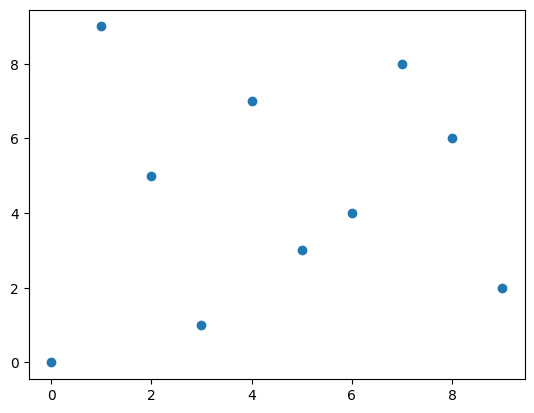

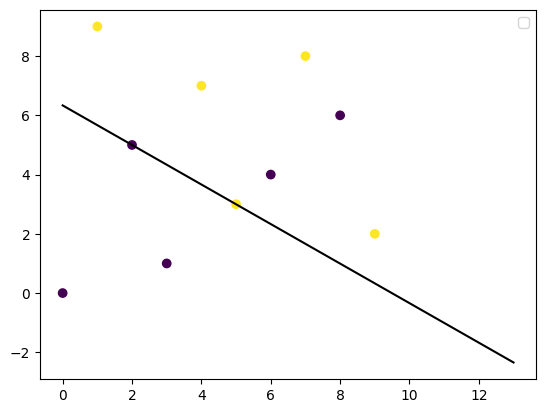

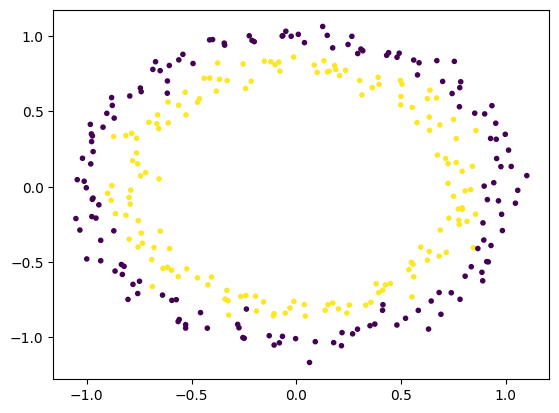

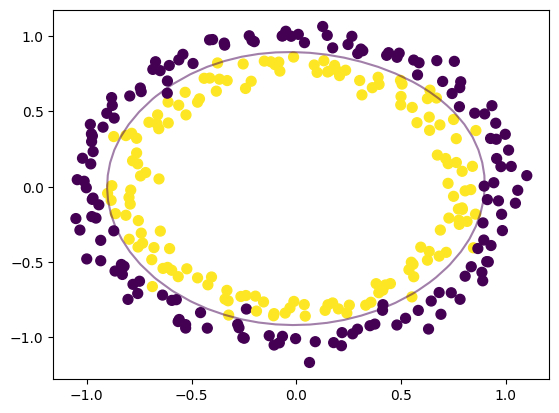

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

# linear data
X = np.array([0,4,2,9,6,1,5,7,3,8])
y = np.array([0, 7, 5, 2, 4, 9, 3, 8, 1, 6 ])

# show unclassified data
plt.scatter(X, y)
plt.show()

# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0]


# define the model
clf = svm.SVC(kernel='linear', C=1.0)

# train the model
clf.fit(training_X, training_y)

# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend()
plt.show()

# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)

# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()

# New section